In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import scipy.stats as st
import numpy as np
import seaborn as sns

df = pd.read_csv("../merge_data/merged_data.csv")
df

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17162,2018,21,111,308000,185086,0.0463,2.5886,0.80,PT01,2,5,1,35,5
17163,2018,51,61,392000,146568,0.0475,1.2506,0.80,PT01,2,5,1,45,5
17164,2018,37,63,292000,107208,0.0463,1.3301,0.80,PT01,1,5,1,39,5
17165,2018,37,147,315200,104844,0.0488,1.7076,0.80,PT01,2,5,1,75,5


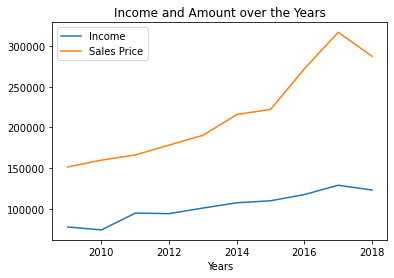

In [2]:
# Create a Graph to represent income vs. price
years_grouped= df.groupby("Year")
x_axis= years_grouped["Year"].unique()
income = years_grouped["Income"].mean()
amount = years_grouped["Amount"].mean()
label= ("Income", "Amount")
#Plot
plt.plot(x_axis, income, label ="Income")
plt.plot(x_axis, amount, label ="Sales Price")
plt.xlabel('Years')
# Set a title of the current axes.
plt.title('Income and Amount over the Years')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

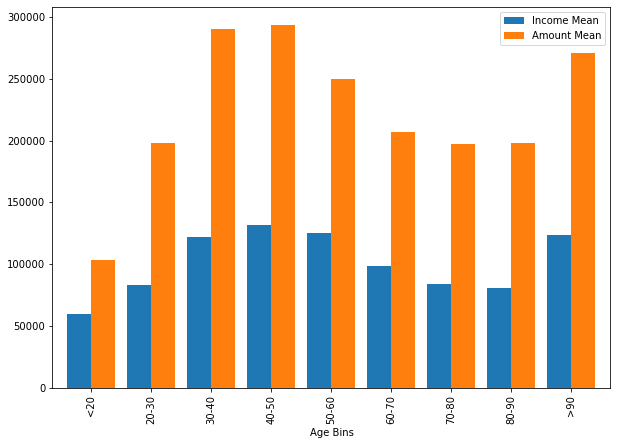

In [3]:
bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

age_group= df.groupby(df["Age Bins"])
age_income= age_group["Income"].mean()
age_amount= age_group["Amount"].mean()

summary_df = pd.DataFrame({"Income Mean": age_income,
                          "Amount Mean": age_amount})
summary_df.plot(kind= "bar", figsize = (10,7) ,rot=90, width=.8)
plt.show()

In [4]:
under_20= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="<20"]
twenties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="20-30"]
thirties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="30-40"]
forties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="40-50"]
fifties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="50-60"]
sixties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="60-70"]
seventies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="70-80"]
eighties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="80-90"]
nineties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]==">90"]

a= ((under_20["Amount"]/under_20["Income"]).groupby(under_20["Year"])).mean()
a= a.fillna(0)
b= ((twenties["Amount"]/twenties["Income"]).groupby(twenties["Year"])).mean()
c= ((thirties["Amount"]/thirties["Income"]).groupby(thirties["Year"])).mean()
d= ((forties["Amount"]/forties["Income"]).groupby(forties["Year"])).mean()
e= ((fifties["Amount"]/fifties["Income"]).groupby(fifties["Year"])).mean()
f= ((sixties["Amount"]/sixties["Income"]).groupby(sixties["Year"])).mean()
g= ((seventies["Amount"]/seventies["Income"]).groupby(seventies["Year"])).mean()
h= ((eighties["Amount"]/eighties["Income"]).groupby(eighties["Year"])).mean()
i= ((nineties["Amount"]/nineties["Income"]).groupby(nineties["Year"])).mean()


In [5]:
df_means= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_means

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,2.085108,2.570360,2.297085,2.180824,1.872166,2.136323,2.872162,3.767292,2.355288
2010,2.796736,2.514651,2.588421,2.420604,2.239691,2.420623,2.562901,3.200739,2.443613
2011,2.551897,2.393448,2.208496,1.937974,1.824605,1.843899,2.432917,1.765701,2.612647
2012,2.773013,2.513409,2.281882,2.213312,1.749175,2.315563,2.262990,1.674095,2.817641
2013,0.769270,2.374069,2.242762,2.112627,1.873119,1.818955,2.719933,2.900277,2.286926
2014,NaN,2.331111,2.276418,2.252041,1.883523,1.828505,2.092567,2.679044,2.627142
2015,1.792707,2.288320,2.320974,2.141850,1.994520,2.089958,2.419338,2.052886,2.468399
2016,3.063664,2.558325,2.649723,2.478179,2.245465,2.210629,2.376145,3.087581,2.205630
2017,2.005984,2.801855,2.758020,2.702420,2.468065,2.524139,2.447201,4.061639,2.450005


In [6]:
df_means.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,2.085108,2.570360,2.297085,2.180824,1.872166,2.136323,2.872162,3.767292,2.355288
2010,2.796736,2.514651,2.588421,2.420604,2.239691,2.420623,2.562901,3.200739,2.443613
2011,2.551897,2.393448,2.208496,1.937974,1.824605,1.843899,2.432917,1.765701,2.612647
2012,2.773013,2.513409,2.281882,2.213312,1.749175,2.315563,2.262990,1.674095,2.817641
2013,0.769270,2.374069,2.242762,2.112627,1.873119,1.818955,2.719933,2.900277,2.286926
2014,0.000000,2.331111,2.276418,2.252041,1.883523,1.828505,2.092567,2.679044,2.627142
2015,1.792707,2.288320,2.320974,2.141850,1.994520,2.089958,2.419338,2.052886,2.468399
2016,3.063664,2.558325,2.649723,2.478179,2.245465,2.210629,2.376145,3.087581,2.205630
2017,2.005984,2.801855,2.758020,2.702420,2.468065,2.524139,2.447201,4.061639,2.450005


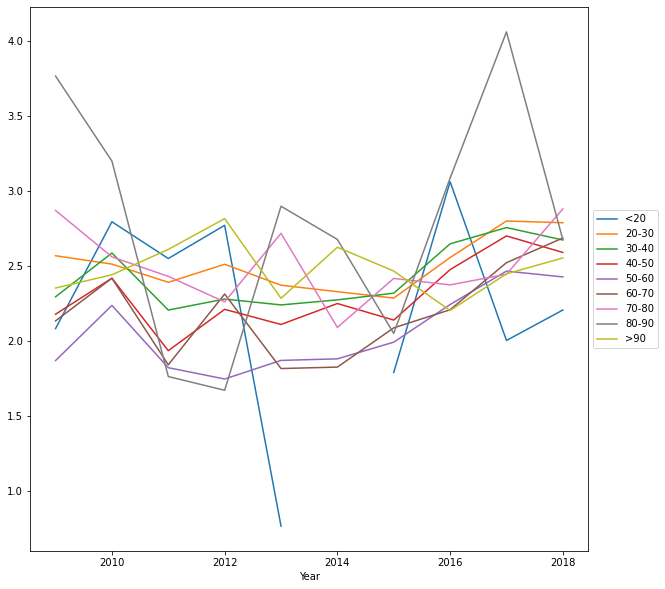

In [7]:
df_means.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [8]:
under_20= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="<20"]
twenties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="20-30"]
thirties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="30-40"]
forties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="40-50"]
fifties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="50-60"]
sixties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="60-70"]
seventies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="70-80"]
eighties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="80-90"]
nineties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]==">90"]

a= ((under_20["Amount"]/under_20["Income"]).groupby(under_20["Year"])).median()
b= ((twenties["Amount"]/twenties["Income"]).groupby(twenties["Year"])).median()
c= ((thirties["Amount"]/thirties["Income"]).groupby(thirties["Year"])).median()
d= ((forties["Amount"]/forties["Income"]).groupby(forties["Year"])).median()
e= ((fifties["Amount"]/fifties["Income"]).groupby(fifties["Year"])).median()
f= ((sixties["Amount"]/sixties["Income"]).groupby(sixties["Year"])).median()
g= ((seventies["Amount"]/seventies["Income"]).groupby(seventies["Year"])).median()
h= ((eighties["Amount"]/eighties["Income"]).groupby(eighties["Year"])).median()
i= ((nineties["Amount"]/nineties["Income"]).groupby(nineties["Year"])).median()

df_medians= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_medians.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,1.727013,2.500000,2.285714,2.005268,1.714002,2.094854,2.775319,3.767292,2.424308
2010,2.796736,2.409048,2.468211,2.374124,2.204481,2.356902,3.029823,3.200739,2.660126
2011,2.551897,2.430883,2.133131,1.893390,1.735515,1.431221,2.671884,1.765701,2.178745
2012,2.773013,2.480730,2.120403,2.147215,1.600694,2.271336,2.260789,1.428139,2.773663
2013,0.769270,2.325381,2.164074,1.966263,1.759761,1.786994,2.608441,2.900277,2.295945
2014,0.000000,2.228571,2.179231,2.128536,1.696257,1.768269,1.879195,2.973356,2.679384
2015,1.792707,2.203623,2.213777,2.056105,1.810341,1.941050,2.223995,2.322557,2.569781
2016,3.063664,2.395509,2.483905,2.348485,2.106886,2.014852,2.381081,2.739756,2.063350
2017,2.047943,2.698114,2.627535,2.552559,2.328227,2.370107,2.437689,3.695741,2.310371


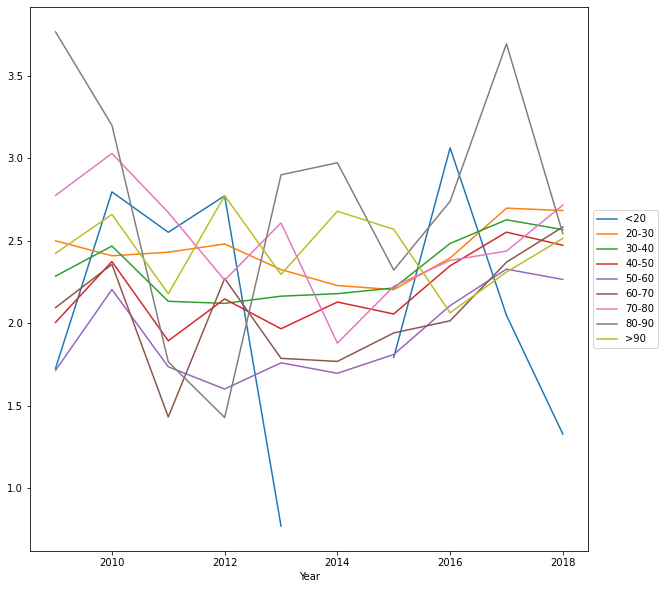

In [9]:
df_medians.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [10]:
under_20= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="<20"]
twenties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="20-30"]
thirties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="30-40"]
forties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="40-50"]
fifties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="50-60"]
sixties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="60-70"]
seventies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="70-80"]
eighties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="80-90"]
nineties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]==">90"]

a= ((under_20["Amount"]).groupby(under_20["Year"])).median()
b= ((twenties["Amount"]).groupby(twenties["Year"])).median()
c= ((thirties["Amount"]).groupby(thirties["Year"])).median()
d= ((forties["Amount"]).groupby(forties["Year"])).median()
e= ((fifties["Amount"]).groupby(fifties["Year"])).median()
f= ((sixties["Amount"]).groupby(sixties["Year"])).median()
g= ((seventies["Amount"]).groupby(seventies["Year"])).median()
h= ((eighties["Amount"]).groupby(eighties["Year"])).median()
i= ((nineties["Amount"]).groupby(nineties["Year"])).median()

df_amount_medians= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_amount_medians.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,78061.0,115931.0,162011,157102,122800,100000.0,136000,80718.0,184000.0
2010,98188.0,119803.5,160910,156887,136000,125767.0,115000,101117.5,157874.0
2011,83937.0,128115.5,191800,141462,139200,135500.0,122500,152200.0,150048.0
2012,81051.0,128000.0,190000,203701,134809,143000.0,81200,142000.0,159065.0
2013,58913.0,142800.0,207600,208000,175000,119787.5,132000,80500.0,189477.5
2014,0.0,135714.0,211300,208000,160000,111600.0,96000,103500.0,328500.0
2015,74875.0,142200.0,216900,224000,166200,140000.0,151000,130000.0,427500.0
2016,165300.0,172500.0,252950,278800,242625,162500.0,161300,186250.0,193250.0
2017,72636.5,208080.0,340000,343978,262617,217450.0,205000,332000.0,234400.0


In [11]:
a= ((under_20["Income"]).groupby(under_20["Year"])).median()
b= ((twenties["Income"]).groupby(twenties["Year"])).median()
c= ((thirties["Income"]).groupby(thirties["Year"])).median()
d= ((forties["Income"]).groupby(forties["Year"])).median()
e= ((fifties["Income"]).groupby(fifties["Year"])).median()
f= ((sixties["Income"]).groupby(sixties["Year"])).median()
g= ((seventies["Income"]).groupby(seventies["Year"])).median()
h= ((eighties["Income"]).groupby(eighties["Year"])).median()
i= ((nineties["Income"]).groupby(nineties["Year"])).median()
df_income_medians= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_income_medians.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,45200.0,44712.0,72247.0,76257.5,69110,53472.0,69199.0,21426.0,113916.0
2010,36294.0,48901.5,64053.5,67716.0,75252,57756.0,52956.0,32042.5,60072.0
2011,32892.0,54106.0,90444.0,90158.5,85000,80729.0,48495.5,87866.0,71321.5
2012,30270.0,50411.0,91576.5,102924.0,84816,64027.0,47496.0,59886.0,53794.0
2013,76583.0,63340.0,96700.0,102108.0,98279,72920.0,50640.0,27365.5,92753.5
2014,0.0,64488.0,100796.5,101916.0,95000,69139.5,50213.0,43049.0,117000.0
2015,41474.5,67300.0,97608.0,114384.0,101094,71123.0,64320.0,117253.0,133536.0
2016,53955.0,77002.0,109992.0,124609.0,122322,86040.0,74221.5,61278.0,104791.5
2017,29796.0,81533.0,124774.5,129960.0,121053,92614.0,82194.0,65648.0,90000.0


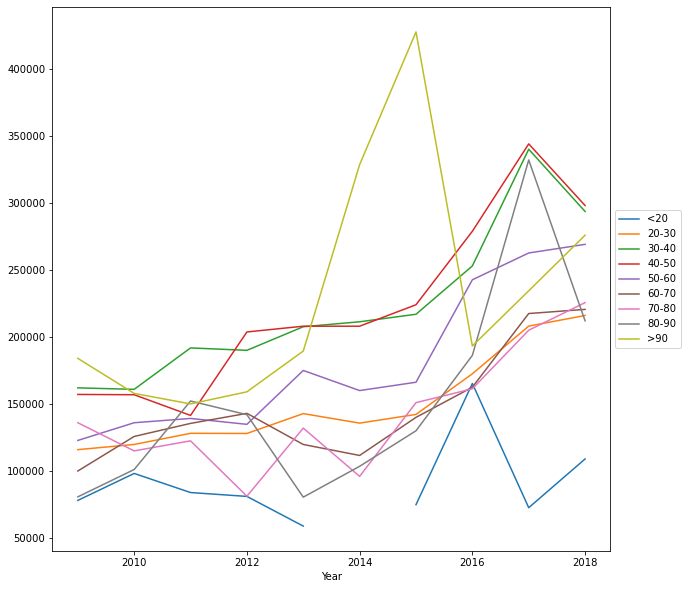

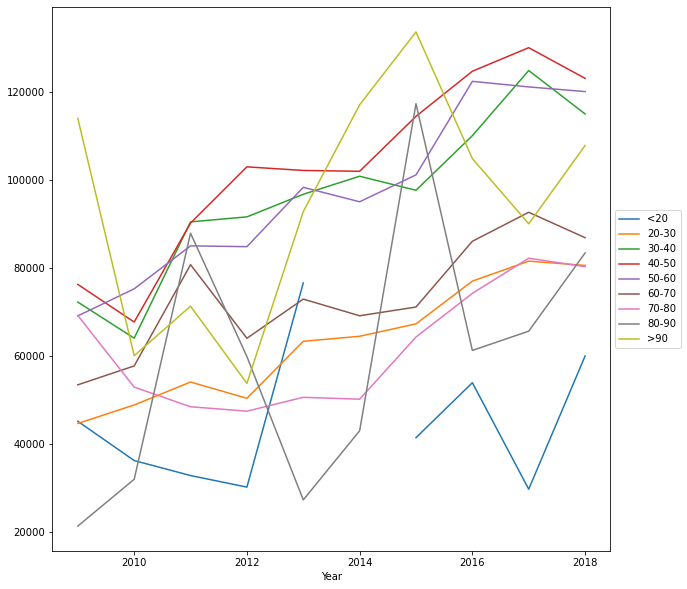

In [12]:
df_amount_medians.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
df_income_medians.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

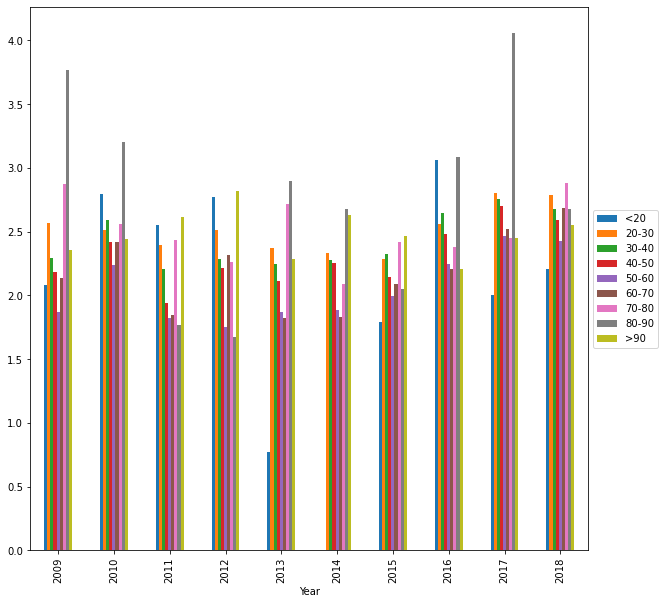

In [13]:
df_means.plot(kind="bar", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [14]:
under_20= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="<20"]
twenties= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="20-30"]
thirties= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="30-40"]
forties= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="40-50"]
fifties= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="50-60"]
sixties= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="60-70"]
seventies= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="70-80"]
eighties= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]=="80-90"]
nineties= df[["Age Bins", "Rate", "Year"]].loc[df["Age Bins"]==">90"]

a= ((under_20["Rate"]).groupby(under_20["Year"])).mean()
b= ((twenties["Rate"]).groupby(twenties["Year"])).mean()
c= ((thirties["Rate"]).groupby(thirties["Year"])).mean()
d= ((forties["Rate"]).groupby(forties["Year"])).mean()
e= ((fifties["Rate"]).groupby(fifties["Year"])).mean()
f= ((sixties["Rate"]).groupby(sixties["Year"])).mean()
g= ((seventies["Rate"]).groupby(seventies["Year"])).mean()
h= ((eighties["Rate"]).groupby(eighties["Year"])).mean()
i= ((nineties["Rate"]).groupby(nineties["Year"])).mean()

df_rate_mean= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_rate_mean.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,0.055433,0.052978,0.052334,0.052224,0.051849,0.052206,0.052378,0.053800,0.050033
2010,0.051250,0.047678,0.046819,0.046529,0.047181,0.047331,0.048445,0.048150,0.045600
2011,0.046300,0.044688,0.045106,0.043779,0.044119,0.043000,0.046015,0.041900,0.043350
2012,0.038750,0.036899,0.036358,0.036326,0.035648,0.036358,0.037167,0.037933,0.036751
2013,0.035000,0.038559,0.038527,0.038420,0.037770,0.038616,0.039232,0.040650,0.038239
2014,0.000000,0.041628,0.041590,0.041289,0.040954,0.040532,0.040084,0.042760,0.042315
2015,0.041900,0.037967,0.038177,0.037759,0.037062,0.037590,0.036600,0.039040,0.039804
2016,0.036300,0.036020,0.035877,0.035801,0.035346,0.035142,0.035307,0.035633,0.036583
2017,0.039800,0.040380,0.040411,0.040632,0.040066,0.039794,0.039380,0.042020,0.040292


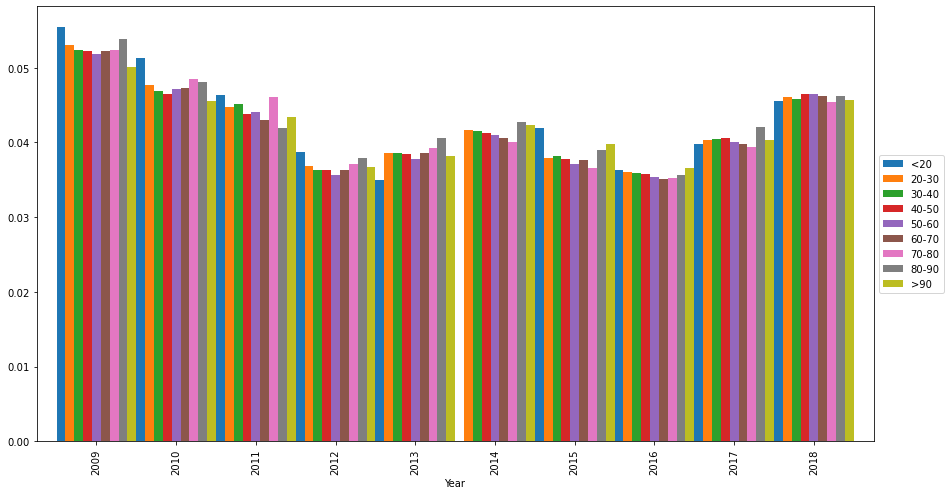

In [15]:
df_rate_mean.plot(kind="bar", figsize=(15,8), width=1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [16]:
def interest(rate,amount,years):
    t = years*12
    m_rate = rate/12.
    month = amount * (m_rate*(1+m_rate)**t)/(((1+m_rate)**t)-1)
    final = round(month*years*12,2)
    return(final)
def total_paid(amount,rate,LTV,years):
    loan = interest(rate,amount,years)
    tot = amount/LTV # total value of home before interest on loan
    down_pay = round(tot-amount,2)
    total = loan + down_pay
    return(total)

In [17]:
amount = np.array(df['Amount'].tolist())
ltv = np.array(df['LTV'].tolist())
rat = np.array(df['Rate'].tolist())
tp = []
for amount,ltv,rate in zip(amount,ltv,rat):
    tp.append(total_paid(amount,rate,ltv,30))
df['Total'] = tp
df.head()

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score,Age Bins,Total
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5,30-40,319123.86
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5,50-60,447696.82
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5,20-30,505123.90
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5,30-40,532544.11
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5,40-50,1535064.56


In [18]:
df['StateFIPS'] = df['StateFIPS'].astype(str)
df['StateFIPS'] = df['StateFIPS'].replace(
    {'1': 'Alabama', '12': 'Florida', '13': "Georgia", '21': 'Kentucky',
    '24': 'Maryland', '28': 'Mississippi', '37': 'North Carolina', '45': 'South Carolina',
    '47': 'Tennessee', '51': 'Virginia', '54': 'West Virginia'})

In [19]:
states= df["StateFIPS"].unique()

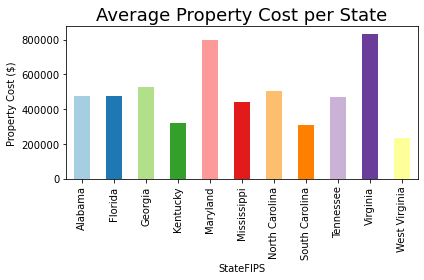

In [20]:
states_group= df.groupby("StateFIPS")
x_state= states_group["StateFIPS"]
y_amount= states_group["Total"].median()
state_df= pd.DataFrame({"Median": y_amount})
color= ["Skyblue", "Green", "Yellow", "Red", "Purple", "Orange", "lightgreen", "blue", "pink", "grey", "teal"]
state_df.plot(kind="bar",legend=False, color=[plt.cm.Paired(np.arange(len(df)))])
plt.ylabel("Property Cost ($)")
plt.title("Average Property Cost per State", fontsize=18)
plt.tight_layout()
plt.savefig("../Images/state_property_cost")
plt.show()


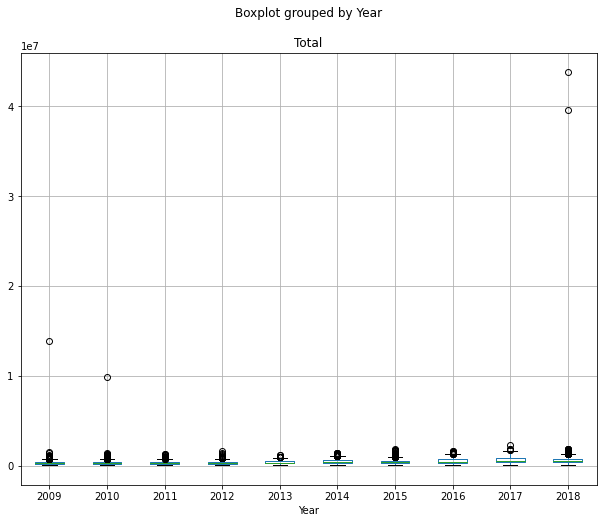

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['Total'], by='Year', ax=ax)
plt.show()

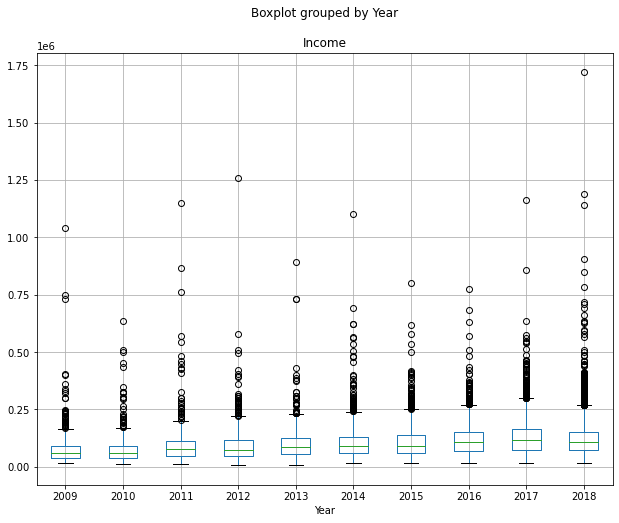

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['Income'], by='Year', ax=ax)
plt.savefig("../Images/box_income.png")
plt.show()

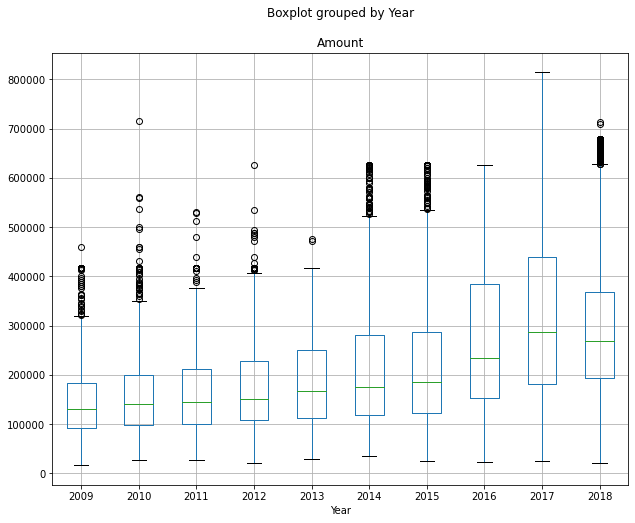

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['Amount'], by='Year', ax=ax)
plt.savefig("../Images/box_amount.png")
plt.show()

In [24]:
df['StateFIPS'] = df['StateFIPS'].astype(str)
df['StateFIPS'] = df['StateFIPS'].replace(
    {'1': 'Alabama', '12': 'Florida', '13': "Georgia", '21': 'Kentucky',
    '24': 'Maryland', '28': 'Mississippi', '37': 'North Carolina', '45': 'South Carolina',
    '47': 'Tennessee', '51': 'Virginia', '54': 'West Virginia'})

In [25]:
kentucky= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Kentucky"]
florida= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Florida"]
north_carolina= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="North Carolina"]
west_virginia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="West Virginia"]
virginia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Virginia"]
south_carolina= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="South Carolina"]
tennessee= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Tennessee"]
georgia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Georgia"]
maryland= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Maryland"]
alabama= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Alabama"]
mississippi= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Mississippi"]

a= ((kentucky["Amount"]).groupby(kentucky["Year"])).mean()
b= ((florida["Amount"]).groupby(florida["Year"])).mean()
c= ((north_carolina["Amount"]).groupby(north_carolina["Year"])).mean()
d= ((west_virginia["Amount"]).groupby(west_virginia["Year"])).mean()
e= ((virginia["Amount"]).groupby(virginia["Year"])).mean()
f= ((south_carolina["Amount"]).groupby(south_carolina["Year"])).mean()
g= ((tennessee["Amount"]).groupby(tennessee["Year"])).mean()
h= ((georgia["Amount"]).groupby(georgia["Year"])).mean()
i= ((maryland["Amount"]).groupby(maryland["Year"])).mean()
j= ((alabama["Amount"]).groupby(alabama["Year"])).mean()
k= ((mississippi["Amount"]).groupby(mississippi["Year"])).mean()

df_state_means= pd.DataFrame({"Kentucky": a,
                       "Florida": b,
                       "North Carolina": c,
                       "West Virginia": d,
                       "Virginia": e,
                       "South Carolina": f,
                       "Tennessee": g,
                       "Georgia": h,
                       "Maryland": i,
                        "Alabama": j,
                        "Mississippi": k})
df_state_means

,Kentucky,Florida,North Carolina,West Virginia,Virginia,South Carolina,Tennessee,Georgia,Maryland,Alabama,Mississippi
Year,,,,,,,,,,,
2009,148289.492126,152623.462500,136551.875000,106986.651786,222070.000000,169217.666667,181481.000000,198000.000000,257178.181818,65000.000000,NaN
2010,144026.500000,165287.153846,188306.333333,103952.462585,241430.222222,168325.662651,171775.720930,177290.875000,256300.166667,203489.600000,77456.000000
2011,154039.907407,221863.000000,181254.000000,140294.928571,190876.714286,154477.649123,180843.974359,145964.900000,194078.333333,309500.000000,252400.000000
2012,172530.977860,196548.900000,155878.400000,126226.250000,212191.857143,134327.666667,207137.418182,183024.333333,252634.871795,212400.000000,NaN
2013,179791.200549,214362.450000,213680.722222,138368.050000,253074.923077,154353.931034,215431.881579,229028.300000,230393.142857,205323.333333,147920.000000
2014,164826.645681,245595.700000,229798.125000,135862.745098,423270.744361,208139.230769,200687.000000,236208.000000,404731.300000,154528.333333,165870.000000
2015,169962.137888,229722.662651,261905.595238,141159.153846,441836.268116,195931.153846,236097.739837,211322.520000,389975.952381,178731.250000,140000.000000
2016,182567.272981,244088.257485,263491.517647,166730.305882,457365.048387,239607.027027,244861.579365,269849.663717,430131.961702,213878.350000,199786.250000
2017,186673.476959,265939.005731,266553.671642,180625.486111,448603.279743,196469.338710,254453.172131,284228.909804,416796.780800,236874.588235,262662.923077


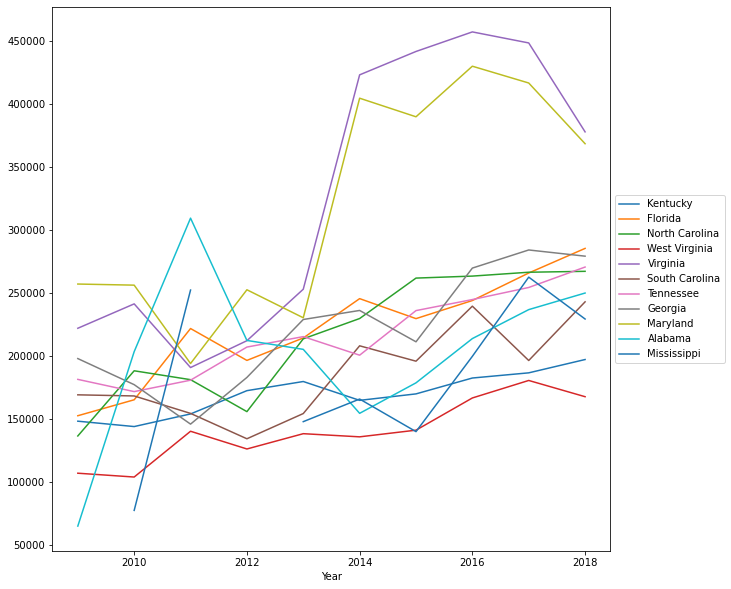

In [26]:
df_state_means.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [27]:
kentucky= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Kentucky"]
florida= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Florida"]
north_carolina= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="North Carolina"]
west_virginia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="West Virginia"]
virginia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Virginia"]
south_carolina= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="South Carolina"]
tennessee= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Tennessee"]
georgia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Georgia"]
maryland= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Maryland"]
alabama= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Alabama"]
mississippi= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Mississippi"]

a= ((kentucky["Amount"]).groupby(kentucky["Year"])).median()
b= ((florida["Amount"]).groupby(florida["Year"])).median()
c= ((north_carolina["Amount"]).groupby(north_carolina["Year"])).median()
d= ((west_virginia["Amount"]).groupby(west_virginia["Year"])).median()
e= ((virginia["Amount"]).groupby(virginia["Year"])).median()
f= ((south_carolina["Amount"]).groupby(south_carolina["Year"])).median()
g= ((tennessee["Amount"]).groupby(tennessee["Year"])).median()
h= ((georgia["Amount"]).groupby(georgia["Year"])).median()
i= ((maryland["Amount"]).groupby(maryland["Year"])).median()
j= ((alabama["Amount"]).groupby(alabama["Year"])).median()
k= ((mississippi["Amount"]).groupby(mississippi["Year"])).median()

df_state_medians= pd.DataFrame({"Kentucky": a,
                       "Florida": b,
                       "North Carolina": c,
                       "West Virginia": d,
                       "Virginia": e,
                       "South Carolina": f,
                       "Tennessee": g,
                       "Georgia": h,
                       "Maryland": i,
                        "Alabama": j,
                        "Mississippi": k})
df_state_medians

,Kentucky,Florida,North Carolina,West Virginia,Virginia,South Carolina,Tennessee,Georgia,Maryland,Alabama,Mississippi
Year,,,,,,,,,,,
2009,130144,123367.5,141427.0,88264.5,214412.5,150228.0,156000,198000.0,231200,65000.0,NaN
2010,128000,155801.0,179827.5,90000.0,192000.0,144060.0,158160,177558.5,216583,222010.0,77456.0
2011,138550,214423.0,173575.0,131460.0,160621.0,137800.0,141600,135500.0,140600,309500.0,252400.0
2012,152000,189056.0,133000.0,117800.0,172372.0,123370.5,180400,152142.5,240000,207107.0,NaN
2013,156875,189280.5,192440.0,124700.0,267602.5,137755.0,199400,265500.0,210000,253650.0,147920.0
2014,145100,243600.0,193600.0,115200.0,442000.0,180200.0,175000,250000.0,417000,165525.0,161600.0
2015,152000,210000.0,255200.0,114300.0,485345.5,165500.0,220800,199520.0,407500,160175.0,140000.0
2016,170000,242000.0,267200.0,145000.0,480600.0,236440.0,235625,276000.0,454050,196750.0,197625.0
2017,173250,256000.0,261504.0,155000.0,475000.0,169171.0,237970,270000.0,462650,238804.5,243843.0


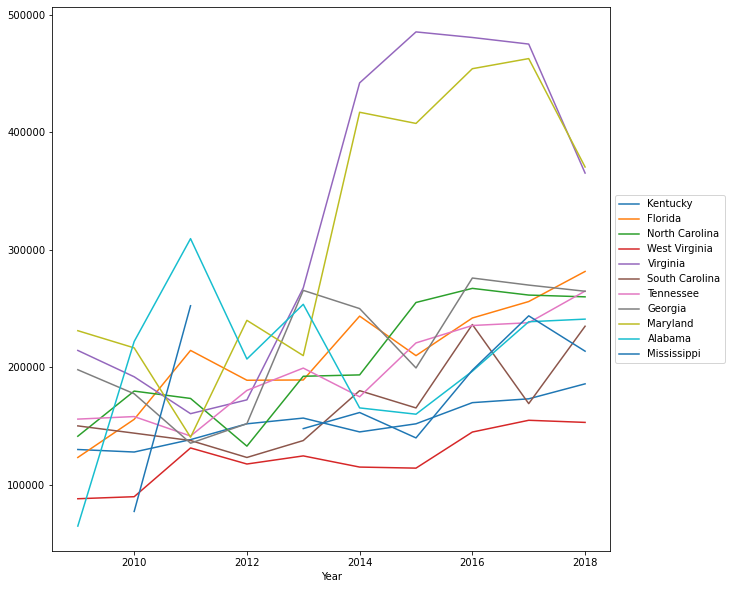

In [28]:
df_state_medians.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [29]:
kentucky= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Kentucky"]
florida= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Florida"]
north_carolina= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="North Carolina"]
west_virginia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="West Virginia"]
virginia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Virginia"]
south_carolina= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="South Carolina"]
tennessee= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Tennessee"]
georgia= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Georgia"]
maryland= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Maryland"]
alabama= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Alabama"]
mississippi= df[["StateFIPS", "Amount", "Total", "Year"]].loc[df["StateFIPS"]=="Mississippi"]

a= ((kentucky["Total"]).groupby(kentucky["Year"])).median()
b= ((florida["Total"]).groupby(florida["Year"])).median()
c= ((north_carolina["Total"]).groupby(north_carolina["Year"])).median()
d= ((west_virginia["Total"]).groupby(west_virginia["Year"])).median()
e= ((virginia["Total"]).groupby(virginia["Year"])).median()
f= ((south_carolina["Total"]).groupby(south_carolina["Year"])).median()
g= ((tennessee["Total"]).groupby(tennessee["Year"])).median()
h= ((georgia["Total"]).groupby(georgia["Year"])).median()
i= ((maryland["Total"]).groupby(maryland["Year"])).median()
j= ((alabama["Total"]).groupby(alabama["Year"])).median()
k= ((mississippi["Total"]).groupby(mississippi["Year"])).median()

df_state_total= pd.DataFrame({"Kentucky": a,
                       "Florida": b,
                       "North Carolina": c,
                       "West Virginia": d,
                       "Virginia": e,
                       "South Carolina": f,
                       "Tennessee": g,
                       "Georgia": h,
                       "Maryland": i,
                        "Alabama": j,
                        "Mississippi": k})
df_state_total

,Kentucky,Florida,North Carolina,West Virginia,Virginia,South Carolina,Tennessee,Georgia,Maryland,Alabama,Mississippi
Year,,,,,,,,,,,
2009,288438.040,259329.870,290090.160,184876.415,437579.375,298884.320,349117.600,418527.540,487982.440,149657.360,NaN
2010,278893.635,285348.450,335868.660,179750.920,401183.760,273967.260,318244.650,318417.890,453755.010,395418.600,144229.320
2011,294799.910,409840.450,329165.810,255639.895,278830.850,237836.030,327266.590,297795.835,337086.250,648544.485,530539.670
2012,288349.310,377575.215,238411.910,228854.430,300253.130,207541.415,346565.655,261255.250,451841.910,358482.780,NaN
2013,317384.065,388013.790,364661.300,253510.605,522760.985,242483.980,390612.370,514400.765,431892.060,430045.710,283594.610
2014,297497.810,488267.150,383860.795,238799.420,889232.790,384369.510,398537.970,523141.390,878785.025,345132.275,324843.790
2015,299085.720,432894.300,442070.255,231408.650,945520.375,286594.720,444616.390,365450.050,761234.345,282918.670,237143.660
2016,323026.860,442210.300,491761.420,272562.910,876103.370,456950.640,438538.355,498745.070,832439.620,331404.615,338072.065
2017,349780.260,494819.260,508957.260,294167.755,930460.850,302151.195,478491.610,528397.760,891032.970,463254.420,437125.280


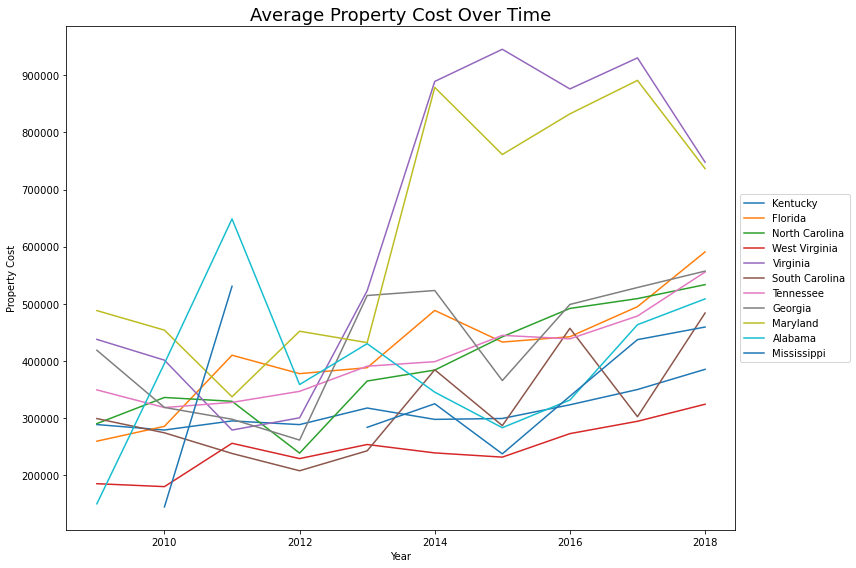

In [30]:
df_state_total.plot(kind="line", figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Average Property Cost Over Time", fontsize=18)
plt.ylabel("Property Cost")
plt.tight_layout()
plt.savefig("../Images/states_total_years.png")
plt.show()

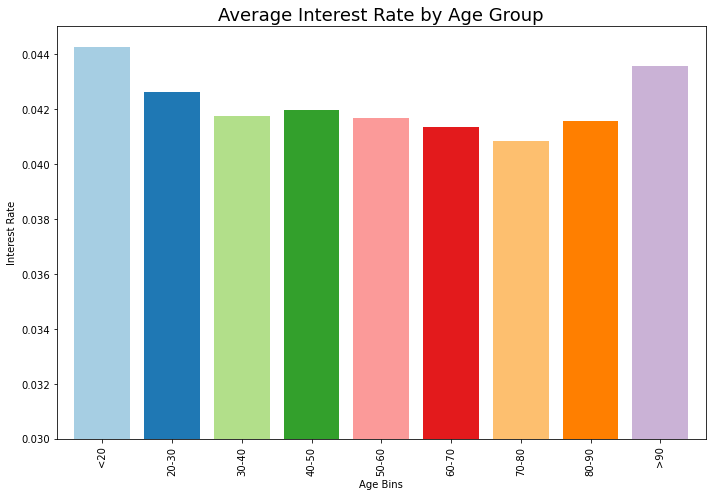

In [31]:
bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

age_group= df.groupby(df["Age Bins"])
age_rate= age_group["Rate"].mean()


summary_df = pd.DataFrame({"Avg Rate": age_rate})
summary_df.plot.bar(figsize = (10,7) ,rot=90, width=.8,legend=False, color=[plt.cm.Paired(np.arange(len(df)))])
plt.ylim(.03, .045)
plt.ylabel("Interest Rate")
plt.title("Average Interest Rate by Age Group", fontsize=18)
plt.tight_layout()
plt.savefig("../Images/age_group_rates.png")
plt.show()